In [1]:
import pandas as pd
import re

with open('adult.data') as f:
    cols = []
    for line in f:
        sre = re.match(r'(?P<colname>[a-z\\-]+):.*\\.', line)
        if sre:
            cols.append(sre.group('colname'))
    cols.append('label')
df = pd.read_csv("adult.data")
df.columns = ['Age', 'WorkClass','77516','Education','Hoursperweek','Status','Occupation','Relatives','Race','Gender','2174','0','40','Country','>50K']
#df = df.drop(columns = ['77516','2174', '0', '40'],axis =1)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

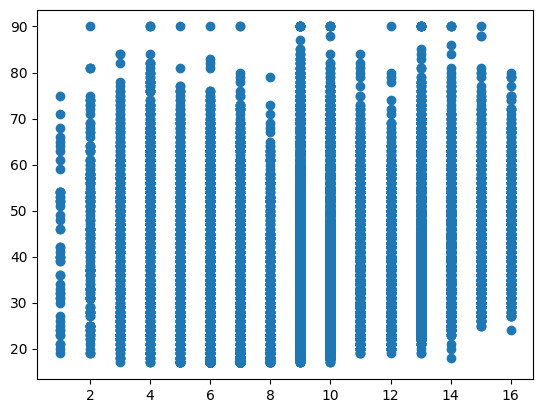

In [3]:
fig,ax = plt.subplots()
ax.scatter(x = df["Hoursperweek"],y = df["Age"])
plt.show()

In [4]:
df.describe()
#0 means they dont have

,Age,77516,Hoursperweek,2174,0,40,>50K
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469,0.240817
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618,0.427586
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [5]:
df.isna().sum()

Age             0
WorkClass       0
77516           0
Education       0
Hoursperweek    0
Status          0
Occupation      0
Relatives       0
Race            0
Gender          0
2174            0
0               0
40              0
Country         0
>50K            0
dtype: int64

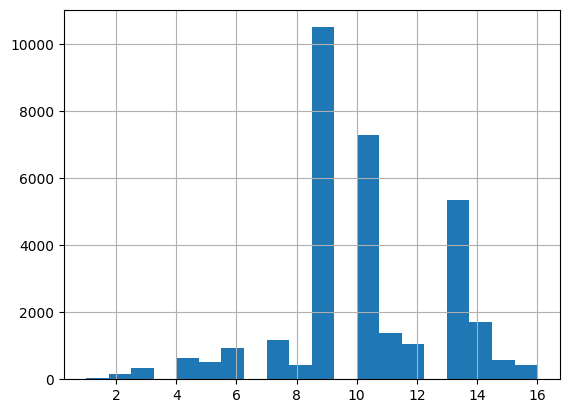

In [6]:
df["Hoursperweek"].hist(bins = 20);

In [7]:
df.columns

Index(['Age', 'WorkClass', '77516', 'Education', 'Hoursperweek', 'Status',
       'Occupation', 'Relatives', 'Race', 'Gender', '2174', '0', '40',
       'Country', '>50K'],
      dtype='object')

In [8]:
df.dtypes

Age              int64
WorkClass       object
77516            int64
Education       object
Hoursperweek     int64
Status          object
Occupation      object
Relatives       object
Race            object
Gender          object
2174             int64
0                int64
40               int64
Country         object
>50K             int64
dtype: object

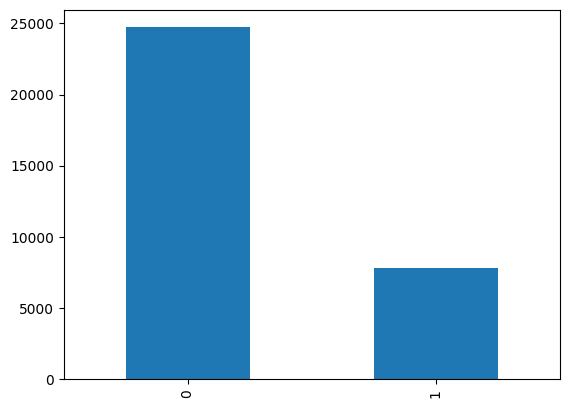

In [9]:
#There are 8 objects and 3 integer types
#Data preprocessing is the essential part of machine learning ,as it is a process of cleaning, transforming  and cleaning data so it can be usable by a machine learning  model.
df[">50K"].value_counts().plot.bar();


In [10]:
df[">50K"].value_counts()#From what we can see 24719people have less than 50K while 7841 have more than 50k

0    24719
1     7841
Name: >50K, dtype: int64

In [11]:
df.dtypes

Age              int64
WorkClass       object
77516            int64
Education       object
Hoursperweek     int64
Status          object
Occupation      object
Relatives       object
Race            object
Gender          object
2174             int64
0                int64
40               int64
Country         object
>50K             int64
dtype: object

In [12]:
data = pd.get_dummies(df,columns= ['WorkClass','Education','Status', 'Occupation',
       'Relatives', 'Race', 'Gender', 'Country','>50K'])

In [13]:
data.head()
column = df.columns

In [14]:
df["WorkClass"].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: WorkClass, dtype: int64

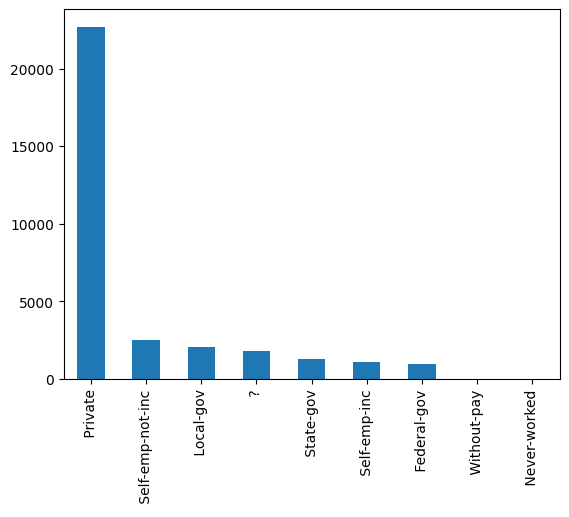

In [15]:
df["WorkClass"].value_counts().plot.bar();

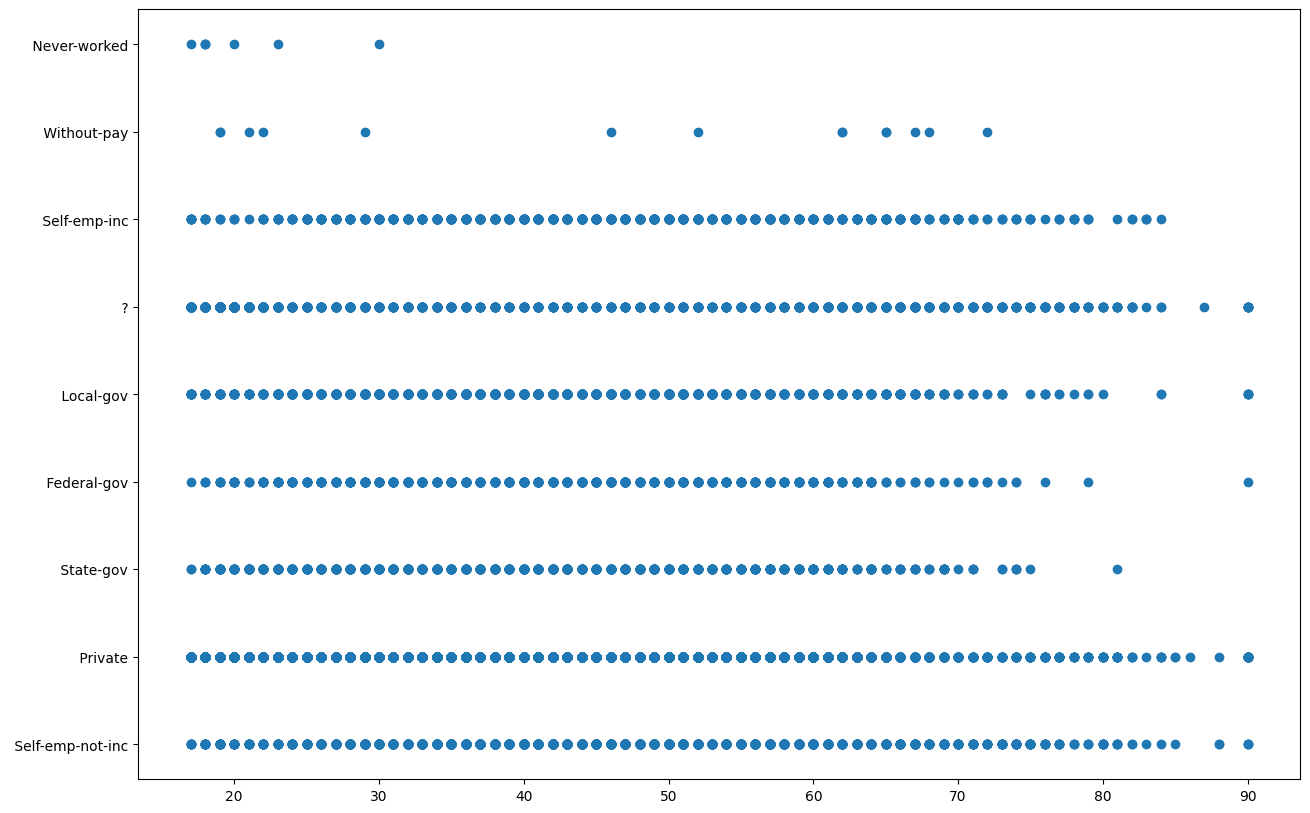

In [16]:
fig,ax = plt.subplots(figsize = (15,10))
ax.scatter(x= df["Age"],y = df["WorkClass"])
plt.show()

In [17]:
pd.crosstab(df["Age"],df[">50K"])[:10]

>50K,0,1
Age,,
17,395,0
18,550,0
19,710,2
20,753,0
21,717,3
22,752,13
23,865,12
24,767,31
25,788,53


In [18]:
pd.crosstab(df["Age"],df["WorkClass"])[:10]

WorkClass,?,Federal-gov,Local-gov,Never-worked,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
Age,,,,,,,,,
17,64,1,14,1,300,7,6,2,0
18,92,3,10,3,413,6,14,9,0
19,113,5,11,0,540,3,17,21,2
20,115,9,12,1,581,3,11,21,0
21,89,3,9,0,577,1,10,30,1
22,79,11,20,0,605,5,13,31,1
23,46,13,35,1,733,6,13,30,0
24,34,14,33,0,655,6,21,35,0
25,32,8,44,0,693,12,26,26,0


<Axes: ylabel='Age'>

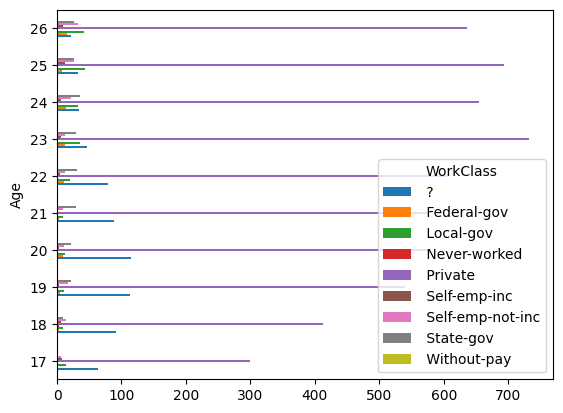

In [19]:
pd.crosstab(df["Age"],df["WorkClass"])[:10].plot.barh()

In [20]:
df[:10]

,Age,WorkClass,77516,Education,Hoursperweek,Status,Occupation,Relatives,Race,Gender,2174,0,40,Country,>50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,0
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,1
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           32560 non-null  int64 
 1   WorkClass     32560 non-null  object
 2   77516         32560 non-null  int64 
 3   Education     32560 non-null  object
 4   Hoursperweek  32560 non-null  int64 
 5   Status        32560 non-null  object
 6   Occupation    32560 non-null  object
 7   Relatives     32560 non-null  object
 8   Race          32560 non-null  object
 9   Gender        32560 non-null  object
 10  2174          32560 non-null  int64 
 11  0             32560 non-null  int64 
 12  40            32560 non-null  int64 
 13  Country       32560 non-null  object
 14  >50K          32560 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [22]:
df.dtypes

Age              int64
WorkClass       object
77516            int64
Education       object
Hoursperweek     int64
Status          object
Occupation      object
Relatives       object
Race            object
Gender          object
2174             int64
0                int64
40               int64
Country         object
>50K             int64
dtype: object

### Using standard scaler to scale the numerical features

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import numpy as np
np.random.seed(40)
numerical_category = ["Age","Hoursperweek"]
object_category = ["WorkClass","Education","Status","Occupation","Relatives","Race","Gender","Country"]
x = df.drop(">50K",axis = 1)#0 =  rows, 1 = columns
y = df[">50K"]
numerical_scale = StandardScaler()
one_hot = OneHotEncoder()

transformer_list = [
    ("one_hot",one_hot,object_category ),
    ("numerical",numerical_scale,numerical_category)
]
transformer = ColumnTransformer(transformer_list)

In [24]:
transformed_x = transformer.fit_transform(x)

In [29]:
x_train,x_test,y_train,y_test = train_test_split(transformed_x,y, test_size = 0.3)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)


RandomForestClassifier()

In [33]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(classifier,x_train,y_train,cv =10)

## Without using a scaled numerical feature

In [34]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
np.random.seed(40)
#numerical_category = ["Age","Hoursperweek"]
object_category = ["WorkClass","Education","Status","Occupation","Relatives","Race","Gender","Country"]
x = df.drop(">50K",axis = 1)#0 =  rows, 1 = columns
y = df[">50K"]
numerical_scale = StandardScaler()
one_hot = OneHotEncoder()

transformer_list = [
    ("one_hot",one_hot,object_category ),
    #("numerical",numerical_scale,numerical_category)
]
transformer1 = ColumnTransformer(transformer_list)
transformed = transformer1.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(transformed,y, test_size = 0.3)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)
classifier.score(x_test,y_test)

0.8227886977886978

In [35]:
from sklearn.svm import LinearSVC
np.random.seed(40)
classifier_svc = LinearSVC()
classifier_svc.fit(x_train,y_train)
classifier_svc.score(x_test,y_test)

C:\Users\JOHNSON\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


0.8294430794430795

In [36]:
y_prediction = classifier.predict(x_test)

In [37]:
import numpy as np
np.mean(y_test == y_prediction)

0.8227886977886978

In [38]:
from sklearn.model_selection import cross_val_score
classification_r1 = cross_val_score(classifier,transformed,y,cv=5)

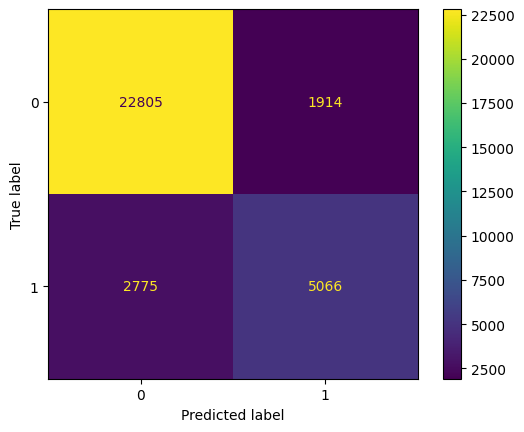

In [39]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(estimator = classifier, X = transformed,y = y)

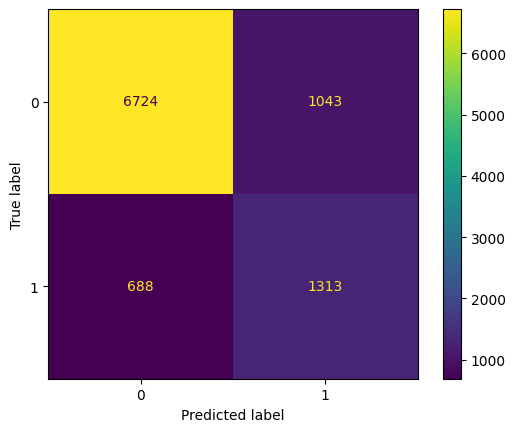

In [40]:
ConfusionMatrixDisplay.from_predictions( y_prediction,y_test)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      7412
           1       0.66      0.56      0.60      2356

    accuracy                           0.82      9768
   macro avg       0.76      0.73      0.74      9768
weighted avg       0.82      0.82      0.82      9768



In [57]:
classifier.score(x_train,y_train)

0.8702176202176202

In [ ]:
classifier.

In [42]:
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(x_train,y_train)

SVC()

In [43]:
svc_classifier.score(x_test,y_test)
ypreds = svc_classifier.predict(x_test)

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,ypreds))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      7412
           1       0.69      0.52      0.60      2356

    accuracy                           0.83      9768
   macro avg       0.78      0.72      0.74      9768
weighted avg       0.82      0.83      0.82      9768



In [45]:
df.columns

Index(['Age', 'WorkClass', '77516', 'Education', 'Hoursperweek', 'Status',
       'Occupation', 'Relatives', 'Race', 'Gender', '2174', '0', '40',
       'Country', '>50K'],
      dtype='object')

In [46]:
over_20 = df[df["Age"]>50 ]
over_20.head()

,Age,WorkClass,77516,Education,Hoursperweek,Status,Occupation,Relatives,Race,Gender,2174,0,40,Country,>50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
20,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,0
23,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,0
24,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,1


In [47]:
over_20.head()

,Age,WorkClass,77516,Education,Hoursperweek,Status,Occupation,Relatives,Race,Gender,2174,0,40,Country,>50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,1
20,54,Private,302146,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,20,United-States,0
23,59,Private,109015,HS-grad,9,Divorced,Tech-support,Unmarried,White,Female,0,0,40,United-States,0
24,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,1


<Axes: xlabel='Age', ylabel='Occupation'>

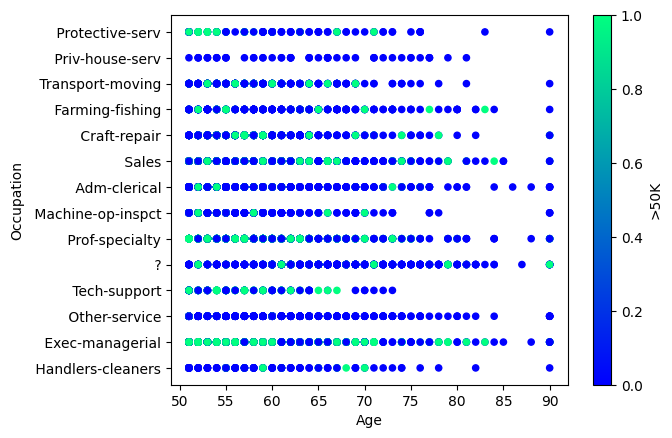

In [48]:
over_20.plot(kind = "scatter",
             x ="Age",
            y = "Occupation",
            c=">50K",
            cmap = "winter"
            )

<Axes: ylabel='Frequency'>

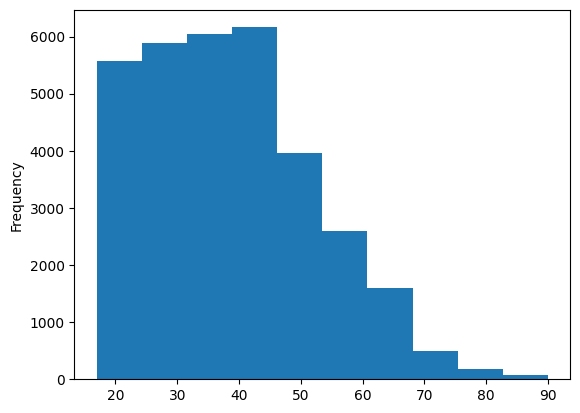

In [49]:
df["Age"].plot.hist()

In [50]:
classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

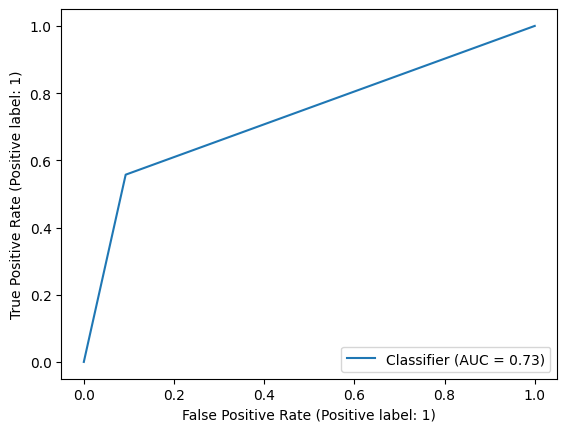

In [51]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test,y_prediction )

In [45]:
grid = {
    "n_estimators":[100,200],
    "max_depth":[None,20,30],
    "max_features":["auto","sqrt"],
    "min_samples_split":[2,4,],
    "min_samples_leaf":[1,4]  
}
from sklearn.model_selection import RandomizedSearchCV
rf_classifier = RandomizedSearchCV(estimator = classifier,
                                   param_distributions= grid,
                                   n_iter = 10,
                                   cv =5,
                                   verbose=2)
rf_classifier.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=  10.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=  10.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=  10.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=  10.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=  11.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, 

C:\Users\JOHNSON\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\JOHNSON\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\JOHNSON\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\loca

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 4],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [100, 200]},
                   verbose=2)

In [46]:
rf_classifier.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [48]:
predictions = rf_classifier.predict(x_test)

In [49]:
rf_classifier.score(x_test,y_test)

0.8266789516789517